<a href="https://colab.research.google.com/github/AdrianSosaUV/ProgramacionEstadistica/blob/master/Distribuciones_Probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios de Distribución de probabilidad

![Tipos de distribución](https://relopezbriega.github.io/images/distributions_choice.png)



#### Configuración

En estas celdas se cargaran las librerías a utilizar así como sus configuraciones 

In [0]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sb 
import pandas as pd 

In [0]:
sb.set_palette("deep", desat=.6)
sb.set_context(rc={"figure.figsize": (8, 4)})


#### En esta celda se cargara la clase "Distribuciones"

In [0]:
class Distribuciones():


	def Histograma(self, data, box=20):
		"""Histograma
		es una representación gráfica de una variable en forma de barras, 
		donde la superficie de cada barra es proporcional a la frecuencia 
		de los valores representado
		"""

		count, box, ignore = plt.hist(data, box)

	def MProbabilidad(self, x, x1, n, n1, p, p1, str='--'):
		"""Función de Masa de Probabilidad
		Asocia a cada punto de su espacio muestral X la probabilidad 
	de que ésta lo asuma.
		"""

		fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
		fmp1 = stats.binom.pmf(x1, n1, p1) # Función de Masa de Probabilidad
		plt.plot(x, fmp, str )
		plt.plot(x1, fmp1)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
		plt.vlines(x1, 0, fmp1, colors='g', lw=5, alpha=0.5)

	def DAcumulada(self, x, x1, n, p, str='--'):
		"""Función de Distribución Acumulada
		 Relaciona los valores con su correspondiente percentil; 
		 Describe la probabilidad de que una variable aleatoria X 
		 sujeta a cierta ley de distribución de probabilidad se sitúe 
		 en la zona de valores menores o iguales a x.
		 """

		fda_binom = stats.binom.cdf(x, n, p)			#Función de distribución acumulada binomial
		fda_normal = stats.norm(10, 1.2).cdf(x1)		#Función de distribución acumulada normal
		plt.plot(x, fda_binom, str, label='FDA binomial')
		plt.plot(x1, fda_normal, label='FDA nomal')
		plt.legend(loc=4)

	def DProbabilidad(self, x):
		"""Función de Densidad de Probabilidad
		Derivada de la Función de Distribución Acumulada
		"""
		
		FDP = stats.norm(10, 1.2).pdf(x)
		plt.plot(x, FDP, label='FDP normal')
		
	def Poisson(self, x, fun, str='--'):
		"""Distribución de Poisson
		La Distribución Poisson describe la probabilidad de encontrar exactamente r eventos 
		en un lapso de tiempo si los acontecimientos se producen de forma independiente a 
		una velocidad constante μ.
		"""

		fmp = fun.pmf(x) 
		plt.plot(x, fmp, str)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

	def Binomial(self, x, fun, str='--'):
		"""Distribución Binomial
		Describe la probabilidad de exactamente 'r' éxitos en 'N' 
		pruebas si la probabilidad de éxito en una sola prueba es 'p'.
		"""

		fmp = fun.pmf(x) 
		plt.plot(x, fmp, str)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

	def Geometrica(self, x, fun, str='--'):
		"""Distribución Geometrica
		Expresa la probabilidad de tener que esperar exactamente 'r' pruebas
		hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es 'p'.
		"""

		fmp = fun.pmf(x) 
		plt.plot(x, fmp, str)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

	def HGeometrica(self, x, fun, str='--'):
		"""Distribución Hiper Geometrica
		Describe experimentos en donde se seleccionan los elementos al azar sin reemplazo
		(se evita seleccionar el mismo elemento más de una vez).
		"""

		fmp = fun.pmf(x) # Función de Masa de Probabilidad
		plt.plot(x, fmp, str)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

	def Bernoulli(self, x, fun, str='bo'):
		"""Distribución de Bernoulli
		Describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso.
		"""

		fmp = fun.pmf(x) 
		fig, ax = plt.subplots()
		ax.plot(x, fmp, str)
		ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
		ax.set_yticks([0., 0.2, 0.4, 0.6])

	
	def Normal(self, x, fun,str='--'):
		"""distribución de Normal 
		tambien llamada distribución de Gauss
		"""
		
		fp = fun.pdf(x) # Función de Probabilidad
		plt.plot(x, fp, str)

	def Uniforme(self, x, fun, str='--'):
		"""Distribución Uniforme"""

		fp = fun.pdf(x) # Función de Probabilidad
		fig, ax = plt.subplots()
		ax.plot(x, fp, str)
		ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
		ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])

	def LogN(self, x, fun):
		"""Distribución Log-Normal"""

		fp = fun.pdf(x) # Función de Probabilidad
		plt.plot(x, fp)

	def Exponencial(self, x, fun):
		"""Funcion Exponencial"""

		fp = fun.pdf(x) # Función de Probabilidad
		plt.plot(x, fp)

	def Plot(self, title, ylabel, xlabel):
		"""Función complementaria de graficación"""
		plt.ylabel(ylabel)
		plt.xlabel(xlabel)
		plt.title(title)
		plt.grid()	
		plt.show()

## Ejercicio 1

### A partir del siguiente conjunto de datos, obtener lo siguiente:

* rango de fechas ( más antiguo y más reciente)
* media, mediana y moda del precio del petroleo
* histograma

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/AdrianSosaUV/ProgramacionEstadistica/master/BrentOilPrices.csv")

In [43]:
data.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [0]:
data["Date"] = pd.to_datetime(data["Date"])

In [45]:
# fechas
print("fecha mas antigua: {}".format(data["Date"].min()))
print("fecha mas reciente: {}".format(data["Date"].max()))

fecha mas antigua: 1987-05-20 00:00:00
fecha mas reciente: 2019-09-30 00:00:00


In [46]:
#precios
print("media del precio del petroleo: {}".format(data["Price"].mean()))
print("mediana del precio del petroleo: {}".format(data["Price"].median()))
print("moda del precio del petroleo: {}".format(data["Price"].mode()))

media del precio del petroleo: 46.33260467380719
mediana del precio del petroleo: 31.26
moda del precio del petroleo: 0    18.48
dtype: float64


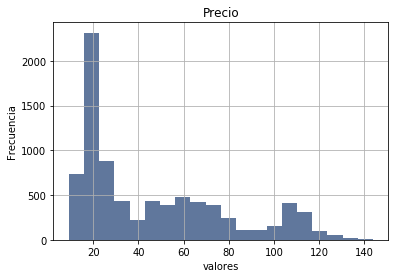

In [47]:
a = Distribuciones()
a.Histograma(data["Price"])
a.Plot("Precio","Frecuencia","valores")

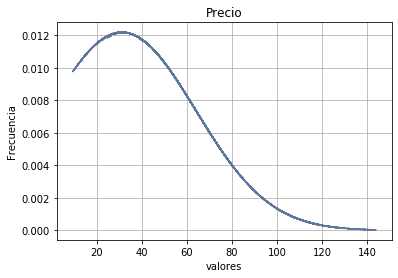

In [48]:
mu, sigma = data["Price"].median(), data["Price"].std() # media y desvio estandar
normal = stats.norm(mu, sigma)

a.Normal(data["Price"], normal)
a.Plot("Precio","Frecuencia","valores")

## Ejercico 2

### A partir del siguiente conjunto de datos, obtener lo siguiente:

* número de personas encuestadas
* número de personas varones encuestados
* número de personas mujeres encuestadas
* ¿cuantos grupos hay?
* ¿cuales son los grados de estudios que hay en la encuesta?
* ¿cuantas personas hay por cada grado de estudio? 
* ¿cuantas personas tienen curso de preparación y cuantas no?

de las columnas ***math score***, ***reading score*** y ***writing score*** obtener lo siguiente:

* mínimo
* máximo
* promedio
* ¿que tipo de dato es?(cada columna)
* tipo de distribución
* Histograma

***Justifique sus respuestas***

#### Parte 1

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/AdrianSosaUV/ProgramacionEstadistica/master/StudentsPerformance.csv")

In [50]:
data.head()

,gender,group,education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
data["gender"].count()

1000

In [52]:
# personas encuestadas
generos = data.groupby(by="gender")
print("encuestados: {} \n".format(data["gender"].count()))
print("varones: {}\n".format(generos.get_group("male")["gender"].count() ))
print("mujeres: {}\n".format(generos.get_group("female")["gender"].count() ))

encuestados: 1000 

varones: 482

mujeres: 518



In [53]:
#grupos en la encuesta
grupos = data.groupby(data["group"]).count()
grupos["gender"]

group
group A     89
group B    190
group C    319
group D    262
group E    140
Name: gender, dtype: int64

In [54]:
#grados academicos
academia = data.groupby(data["education"]).count()
academia["gender"]

education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: gender, dtype: int64

In [55]:
degrees = ["associate's degree","bachelor's degree","high school","master's degree","some college","some high school"]
for i in degrees :
  grupo = data.groupby(data["education"]).get_group(i)
  varones = grupo.groupby("gender").get_group("male")
  mujeres = grupo.groupby("gender").get_group("female")
  print("nivel academico: {}". format(i))
  print("varones: {}".format(varones["gender"].count()))
  print("mujeres: {}\n".format(mujeres["gender"].count()))

nivel academico: associate's degree
varones: 106
mujeres: 116

nivel academico: bachelor's degree
varones: 55
mujeres: 63

nivel academico: high school
varones: 102
mujeres: 94

nivel academico: master's degree
varones: 23
mujeres: 36

nivel academico: some college
varones: 108
mujeres: 118

nivel academico: some high school
varones: 88
mujeres: 91



In [56]:
#curso de preparación
curso = data.groupby("test preparation course")
curso["gender"].count()

test preparation course
completed    358
none         642
Name: gender, dtype: int64

#### Parte 2

columna: math score
maximo: 100
minimo: 0
promedio: 66.089



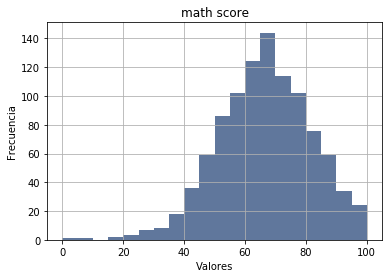

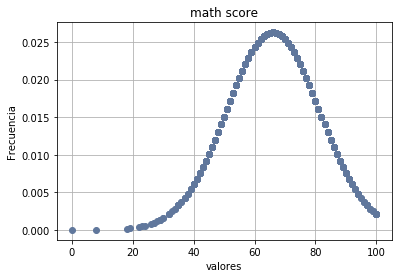

columna: reading score
maximo: 100
minimo: 17
promedio: 69.169



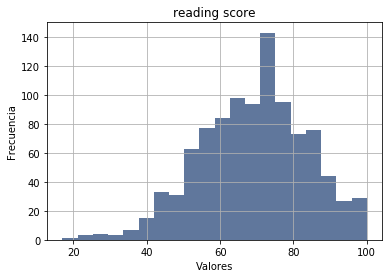

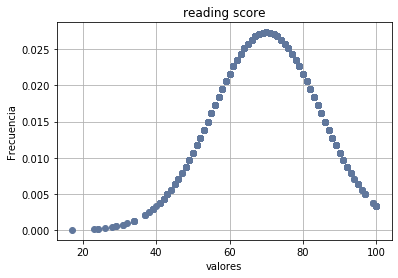

columna: writing score
maximo: 100
minimo: 10
promedio: 68.054



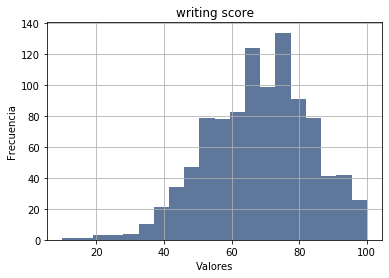

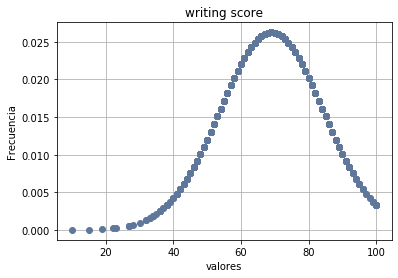

In [58]:
 columnas = ["math score", "reading score" , "writing score"] 
 a = Distribuciones()
 for i in columnas:
   print("columna: {}".format(i))
   print("maximo: {}".format(data[i].max()))
   print("minimo: {}".format(data[i].min()))
   print("promedio: {}\n".format(data[i].mean()))
   a.Histograma(data[i])
   a.Plot(i,"Frecuencia","Valores")

   mu, sigma = data[i].median(), data[i].std() # media y desvio estandar
   normal = stats.norm(mu, sigma)

   a.Normal(data[i], normal, 'o')
   a.Plot(i,"Frecuencia","valores")

